# Question 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

A Classification Decision Tree classifies data into categories by splitting them into subsets using predefined rules of the features of each category. This helps assign data points to discrete labels, capturing the non-linear relationships between the hierachial splits. In real world applciations, it can be like medical diagnosis (benign or malicious), fraud detection, loan approval, etc. In comparision to Multiple Linear Regression models, the difference is that for trees, the target variable is categorical, while in multiple linear regression models, the variable is continous (numerical). 

### **Summary of Chatlog**  
1. **Classification Decision Trees**:
   - Address problems with categorical outcomes (e.g., classifying data into predefined categories).
   - Useful for applications such as medical diagnosis, fraud detection, and customer segmentation.
   - They model non-linear relationships and provide interpretable decision-making through hierarchical splits.

2. **Comparison to Linear Regression**:
   - **Classification Decision Trees** predict discrete class labels, while **Linear Regression** predicts continuous numerical values.
   - Trees capture non-linear relationships and handle both categorical and numerical features, while Linear Regression assumes a linear relationship and requires numerical data.

3. **Comparison to Multiple Linear Regression**:
   - Decision Trees classify data into categories using rules, while Multiple Linear Regression predicts continuous values based on a linear equation.
   - Trees excel with non-linear relationships and complex feature interactions, while Multiple Linear Regression is suited for continuous prediction with linear assumptions.
   - Applications and output differ: Decision Trees predict classes or probabilities, while Linear Regression predicts precise numerical values.  

### **Example Scenarios Discussed**:
- Classification Decision Tree: Classifying customer churn.
- Multiple Linear Regression: Predicting a customer’s spending amount.

https://chatgpt.com/share/673ebfb9-7cec-800a-abac-38eb876731f3 

# Question 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. Accuracy
This is best suited for scenarios when false positives and false negatives have similar costs. For example, weather prediction (no rain or rain) are equally as important. Another scenario could be quality control when identifiying defective vs. non-defective products. 

2. Sensitivity 
This is best suited for scenarios when false negatives are the most costly. For example, detecting cancer - a false negative can be life-threatening, but a false positive are less severe in terms of consequences. 

3. Specificity 
This is best suited for scenarios when avoiding false positive is critical. For example, avoiding flagging legitimate emails as spam, or ensuring that innocent individuals are not wrongfully accused in crime investigations. 

4. Percision 
This is best suited for scenarios where false positives are costly. For example, when we are target marketing, we have to ensure that the 'high-value' customers are likely to repsond to the marketing. Another example is falgging suspicious login attempts while minimizing the amount of lockouts for actual users. These examples show that if there were to be a false positive (thinking that a false situation is true), then it would be have detremental impact. In the first one, if thought the marketing was good, but in fact was not, it could cause the company/campaign to lose a lot of assests. Likewise, for the second one, if thinking that a legetimate user was a suspicious login would cause many problems for the users of the interface.

### **Summary of Chatlog**  

The discussion focuses on four evaluation metrics for predictive models and their real-world applications:

1. **Accuracy**: Measures the proportion of correct predictions. Suitable for balanced datasets where both false positives and false negatives have similar consequences.  
   - Examples: Email classification, weather forecasting.

2. **Sensitivity (Recall)**: Measures the ability to correctly identify actual positives. Crucial when false negatives are costly or dangerous.  
   - Examples: Medical diagnostics, fraud detection, safety systems.

3. **Specificity**: Measures the ability to correctly identify actual negatives. Important when false positives have severe consequences.  
   - Examples: Spam filters, legal systems, product quality control.

4. **Precision**: Measures the accuracy of positive predictions. Key when false positives are particularly costly.  
   - Examples: Targeted marketing, hiring processes, security systems.

The choice of metric depends on the problem context and the trade-off between false positives and false negatives.

https://chatgpt.com/share/673ebfb9-7cec-800a-abac-38eb876731f3

# Question 3.  Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below 

In [10]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the CSV file
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop the specified columns: 'Weight_oz', 'Width', and 'Height'
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop all rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Set the data types for specific columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Check the final DataFrame
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

/tmp/ipykernel_52/3667659770.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_52/3667659770.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_52/3667659770.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# Question 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Training set size: 255
Testing set size: 64


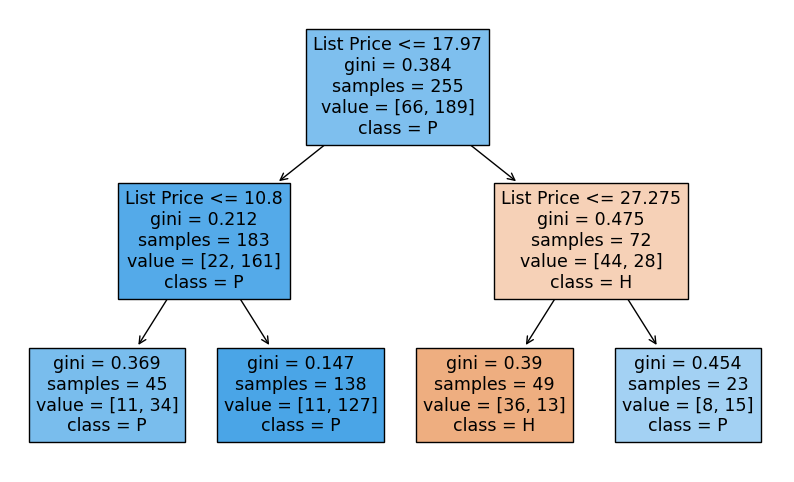

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Split the data into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

# Prepare the feature (List Price) and target variable (Hard_or_Paper)
X_train = ab_reduced_noNaN_train[['List Price']]  # Features
y_train = ab_reduced_noNaN_train['Hard_or_Paper']  # Target variable

# Create and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=clf.classes_, filled=True)
plt.show()




Here, we can see that the nodes are split based on the price vairable. It predicts whether (based on the price vairable) the book will be paperback or hardcover. Here we can see that when the list price is less than 10.8, it is very likely that the book will be paperback (as shown from the two nodes on the left - they are both class P). However, if the price is greater than 27.275, we see a more signfigant difference, where there is a division between hardcover and paperback, where it is more likely to be hardcover, but there is also some chance for paperback. 


# Question 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

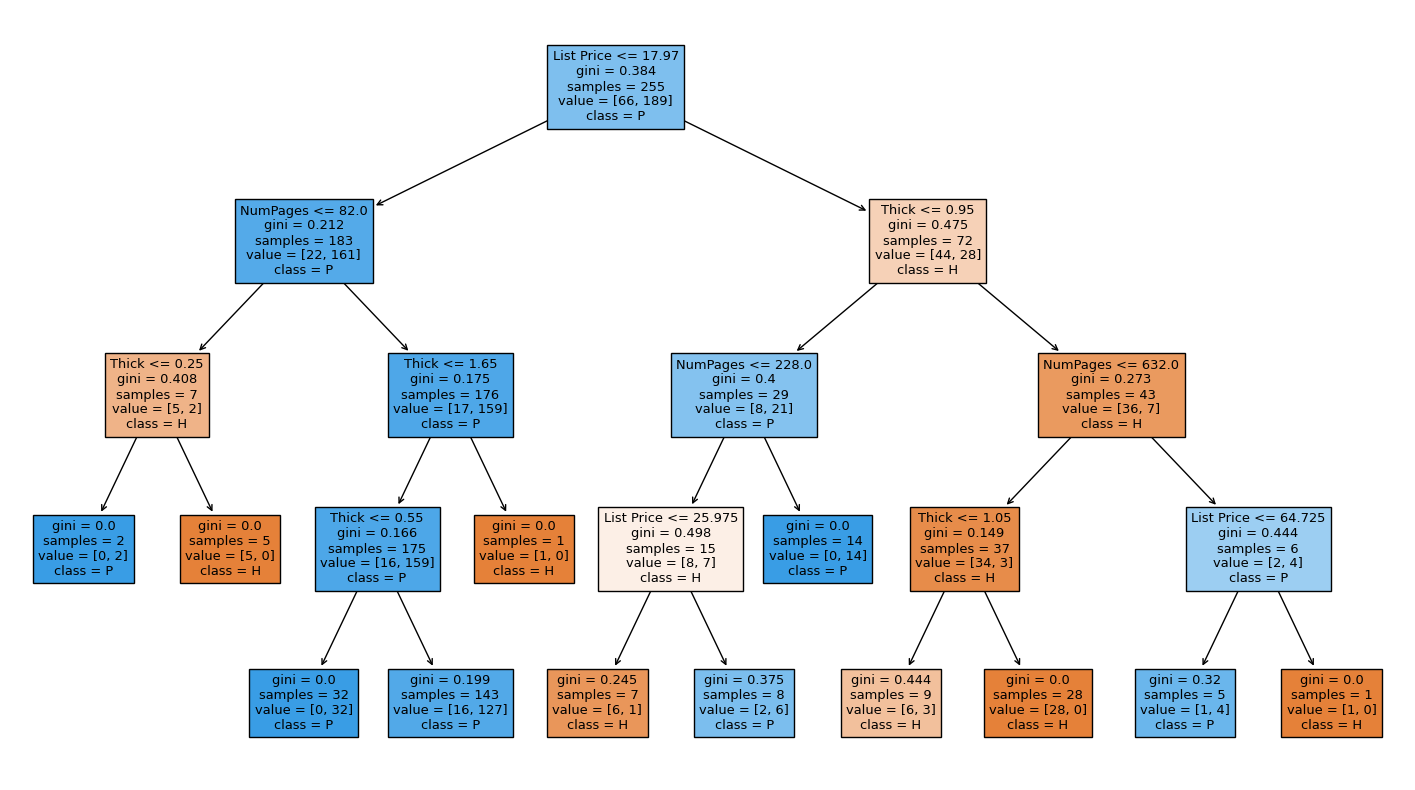

In [6]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 2. Load and preprocess the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns and drop NaN values
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height']).dropna()

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# 3. Split into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# 4. Prepare features and target variable
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_train = ab_reduced_noNaN_train['Hard_or_Paper']

# 5. Fit the Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# 6. Visualize the Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(
    clf,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=clf.classes_,
    filled=True
)
plt.show()



Here the predictions. are deduced by the price lsit, number of pages and how thick the book is. We can form predictions by how the nodes traverse down the true, observing their purity/what class they are in, and make inferences to what the next class might be. For example, we can see that when the number of pages is less than or euqal to 82, and the thickness is less than 0.55, then it is most likely to be a paperback book. 

# Summary Chatlog (Q4 and Q5)
 I guided you through preprocessing the dataset, creating an 80/20 train-test split, and training a DecisionTreeClassifier using NumPages, Thick, and List Price as features to predict Hard_or_Paper. Finally, I provided code to visualize the decision tree with a max depth of 4 and explained how predictions are made based on feature thresholds.

https://chatgpt.com/share/673f539e-a288-800a-b849-1ed644691753

# Question 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models


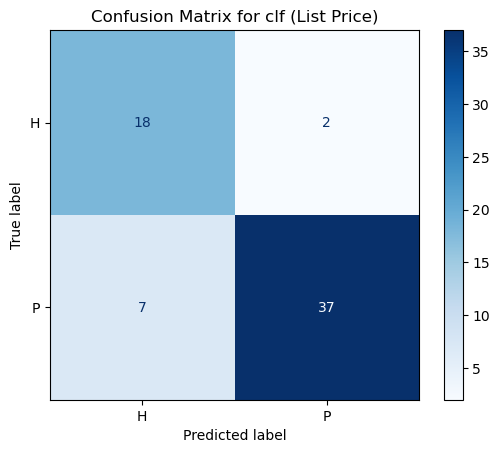

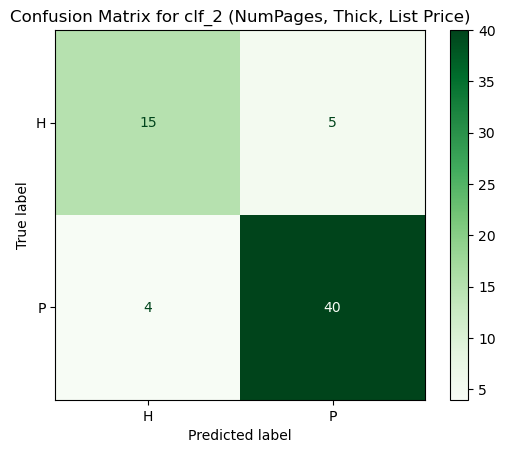

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data as per previous instructions
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height']).dropna()

# Convert columns to correct data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# 80/20 split with random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Prepare the feature and target variables for clf (List Price only)
X_train_clf = ab_reduced_noNaN_train[['List Price']]
y_train = ab_reduced_noNaN_train['Hard_or_Paper']

# Train the Decision Tree Classifier clf using List Price
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_clf, y_train)

# Prepare the feature variables for clf_2 (NumPages, Thick, and List Price)
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Train the Decision Tree Classifier clf_2
clf_2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_2.fit(X_train_clf2, y_train)

# Testing set for confusion matrices
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Only 'List Price' for clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # For clf_2

# Predictions for clf (List Price only)
y_pred_clf = clf.predict(X_test_clf)

# Predictions for clf_2 (NumPages, Thick, List Price)
y_pred_clf2 = clf_2.predict(X_test_clf2)

# Confusion matrix for clf (List Price only)
cm_clf = confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_)
disp_clf.plot(cmap='Blues')
plt.title("Confusion Matrix for clf (List Price)")
plt.show()

# Confusion matrix for clf_2 (NumPages, Thick, List Price)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=clf_2.classes_)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=clf_2.classes_)
disp_clf2.plot(cmap='Greens')
plt.title("Confusion Matrix for clf_2 (NumPages, Thick, List Price)")
plt.show()





In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For clf (using List Price)
y_pred_clf = clf.predict(X_test_clf)

# Calculate Accuracy, Sensitivity (Recall), Specificity, Precision, F1-score for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
precision_clf = precision_score(y_test, y_pred_clf, pos_label='H')  # Assuming 'H' is positive class
recall_clf = recall_score(y_test, y_pred_clf, pos_label='H')  # Sensitivity (True Positive Rate)
f1_clf = f1_score(y_test, y_pred_clf, pos_label='H')

# Specificity (True Negative Rate) for clf
cm_clf = confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()  # Extracting True Negative, False Positive, False Negative, True Positive
specificity_clf = tn_clf / (tn_clf + fp_clf)

# Print metrics for clf
print("Metrics for clf (List Price):")
print(f"Accuracy: {accuracy_clf:.2f}")
print(f"Precision: {precision_clf:.2f}")
print(f"Recall (Sensitivity): {recall_clf:.2f}")
print(f"F1-score: {f1_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print()

# For clf_2 (using NumPages, Thick, List Price)
y_pred_clf2 = clf_2.predict(X_test_clf2)

# Calculate Accuracy, Sensitivity (Recall), Specificity, Precision, F1-score for clf_2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
precision_clf2 = precision_score(y_test, y_pred_clf2, pos_label='H')
recall_clf2 = recall_score(y_test, y_pred_clf2, pos_label='H')
f1_clf2 = f1_score(y_test, y_pred_clf2, pos_label='H')

# Specificity (True Negative Rate) for clf_2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=clf_2.classes_)
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)

# Print metrics for clf_2
print("Metrics for clf_2 (NumPages, Thick, List Price):")
print(f"Accuracy: {accuracy_clf2:.2f}")
print(f"Precision: {precision_clf2:.2f}")
print(f"Recall (Sensitivity): {recall_clf2:.2f}")
print(f"F1-score: {f1_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")


Metrics for clf (List Price):
Accuracy: 0.86
Precision: 0.72
Recall (Sensitivity): 0.90
F1-score: 0.80
Specificity: 0.90

Metrics for clf_2 (NumPages, Thick, List Price):
Accuracy: 0.86
Precision: 0.79
Recall (Sensitivity): 0.75
F1-score: 0.77
Specificity: 0.75


# Summary 
You wanted to calculate performance metrics for decision tree classifiers (clf and clf_2) and understand key metrics like accuracy, sensitivity (recall), specificity, precision, and F1-score. I provided Python code to compute these metrics using scikit-learn.

The code included:

Splitting the data into training and testing sets.
Predicting the target variable for both classifiers.
Using confusion matrices to extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
Calculating each metric based on these values and displaying results for both models.
Metrics help evaluate how well the models classify books as paperback ('P') or hardcover ('H'). Let me know if you need further clarifications!

https://chatgpt.com/share/673f539e-a288-800a-b849-1ed644691753

# Question 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better



The difference is that in the code bwlow, it does not split the data into a 'training set' and a 'testing set', in comparsion to the code above where we did an 80/20 split. This reduces accuracy in predictions as splitting it into two sets helps us evaluate the performance of the model, and to ensure that we don't overfit any data (ensure good generalization). Thus, by splitting the data, we know how accurate the predictions are (which is why the two above are better), but if we don't, we have to take a gamble into it's accuracy. 

# Question 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

The difference is that linear regression coefficents represent the entire effect of the feature on the target vairable, and assume that all other features remain constant (linear relationship). In comparision, in decision trees, we can identify how much an impact a feature has on a target variable by splitting up the data and observing the puritites. Instead of providing a quantivitive relationship, we can obeserve the overall incluence of features to enhance our predictions. 